# Exercise 2: Logistic Regression

This file contains code that helps you get started on the second part
of the exercise which covers regularization with logistic regression.

In [1]:
%matplotlib inline

from numpy import (eye, loadtxt, hstack, zeros, ones, dot, transpose, array, linspace, logspace,
                   meshgrid, float64, log, finfo, exp, mean, double)
from matplotlib import cm
from matplotlib.pyplot import plot, ylabel, xlabel, figure, subplots, contour, legend, axis, title
from scipy.optimize import minimize

In [2]:
## load data

data = loadtxt('ex2data2.txt', dtype=float64, delimiter=',')
X, y = data[:, :2], data[:, -1].reshape(-1, 1)
X.shape

(118, 2)

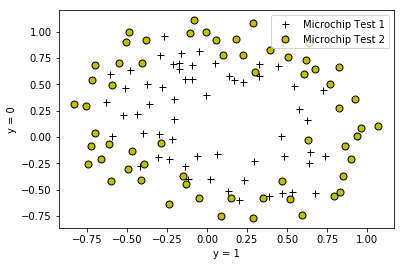

In [3]:
def plot2_data(X, y, data_labels, axis_labels):
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0

    plot(X[pos, 0], X[pos, 1], 'k+', label=data_labels[0],
       markerfacecolor='b', markersize=7)
    plot(X[neg, 0], X[neg, 1], 'ko', label=data_labels[1],
       markerfacecolor='Y', markersize=7)

    # Put some labels
    if axis_labels and len(axis_labels) > 1:
        xlabel(axis_labels[0])
        ylabel(axis_labels[1])
        legend(numpoints=1)
        
plot2_data(X, y, ['Microchip Test 1', 'Microchip Test 2'], ['y = 1', 'y = 0'])

## Part 1: Regularized Logistic Regression

In this part, you are given a dataset with data points that are not
linearly separable. However, you would still like to use logistic
regression to classify the data points.

To do so, you introduce more features to use -- in particular, you add
polynomial features to our data matrix (similar to polynomial
regression).

In [4]:
# add Polynomial Features
# note that mapFeature also adds a column of ones for us, so the intercept term is handled

def mapFeature(X1, X2):
    degree = 6
    size = len(X1)
    out = ones((size, 1))
    
    for i in range(1, degree):
        for j in range(i + 1):
            temp = ((X1 ** (i - j)) * (X2 ** j)).reshape((-1, 1))
            out = hstack([out, temp])
            
    return out

X = mapFeature(X[:, 0], X[:, 1])

In [5]:
# initialize fitting parameters
initial_theta = zeros((X.shape[1], 1))

# set regularization parameter lambda to 1
lambda_ = 1

In [6]:
eps = finfo(float64).eps

def sigmoid(z):
    return 1. / (1. + exp(-z))

def costFunctionReg(theta, X, y, lambda_):
    """cost function with regularization"""

    m, n = X.shape
    theta = theta.reshape(n, 1)

    h_theta = sigmoid(X.dot(theta))
    h_theta[h_theta < eps] = eps
    h_theta[(1 - eps < h_theta) & (h_theta < 1 + eps)] = 1 - eps
    J = (- y.T.dot(log(h_theta)) - (1. - y).T.dot(log(1. - h_theta))) / m + lambda_ / (2 * m) * sum(theta[1:] ** 2)
    grad = X.T.dot(h_theta - y) / m
    grad[1:] = grad[1:] + lambda_ / m * theta[1:]

    return J[0, 0], grad.flatten()

cost, grad = costFunctionReg(initial_theta, X, y, lambda_)
print(f'''Cost at initial theta (zeros): {cost}''')

Cost at initial theta (zeros): 0.6931471805599453


## Part 2: Regularization and Accuracies

In this part, you will get to try different values of lambda and see
how regularization affects the decision coundart.

Try the following values of lambda (0, 1, 10, 100).

How does the decision boundary change when you vary lambda? How does
the training set accuracy vary?

In [7]:
def plot_decision_boundary(theta, X, y, *args):

    # Plot Data
    plot2_data(X[:, 1:3], y, *args)

    n = X.shape[1]

    if n <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plot(plot_x, plot_y, label='Decision Boundary')

        # Legend, specific for the exercise
        axis([30, 100, 30, 100])
    else:
        # Here is the grid range
        u = linspace(-1, 1.5, 50)
        v = linspace(-1, 1.5, 50)
        size = u.size
        z = zeros((size, size))
        # Evaluate z = theta*x over the grid
        for i in range(size):
            for j in range(size):
                z[i, j] = mapFeature(array([u[i]]), array([v[j]])).dot(theta)

        z = z.T
        contour(u, v, z, [0], linewidths=2)

Text(0.5,1,'lambda = 1')

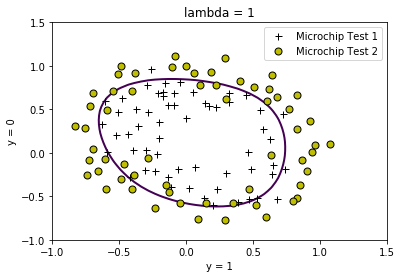

In [8]:
# initialize fitting parameters
initial_theta = zeros((X.shape[1], 1))

# set regularization parameter lambda to 1
lambda_ = 1

result = minimize(costFunctionReg,
                  initial_theta,
                  args=(X, y, lambda_),
                  method='BFGS',
                  jac=True,
                  options=dict(maxiter=400))
cost = result.fun
theta = result.x
plot_decision_boundary(theta, X, y, ['Microchip Test 1', 'Microchip Test 2'], ['y = 1', 'y = 0'])
title(f'lambda = {lambda_}')